<a href="https://colab.research.google.com/github/seunghee0518/python_colab/blob/main/sklearn_Single_Linear_regression%5Bdata_boston%2Cweather%5D%26creating_SLR_function.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#single Linear Regression [by LSM(최소자승법)]

In [46]:
#data
import numpy as np
x = np.array([[2], [4], [6], [8]])
y = np.array([[81], [93], [91], [97]])

In [52]:
#LSM : y= ax + b
mean_x = np.mean(x)
mean_y = np.mean(y)

# diff : a = dividend/divisor
dividend = sum((x-mean_x) * (y - mean_y))
divisor = sum((x - mean_x) * (x - mean_x)) 
a = dividend/divisor

#bias : b = mean_y - (a * mean_x)
b = mean_y - (a * mean_x)

print('a:', a)
print('b:', b)
print('y = ', float(a), 'x + ', float(b))

a: [2.3]
b: [79.]
y =  2.3 x +  79.0


In [53]:
#prediction
preds = (a*x) + b
print('predction', str(preds))

predction [[83.6]
 [88.2]
 [92.8]
 [97.4]]


No handles with labels found to put in legend.


<Figure size 432x288 with 0 Axes>

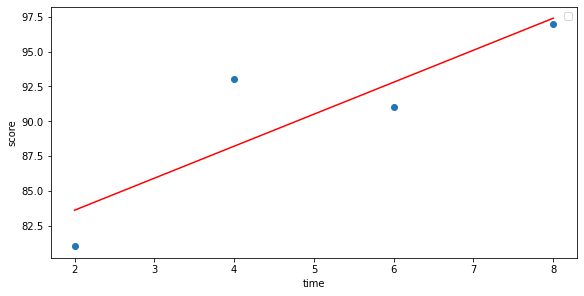

In [58]:
#scatter plot
import matplotlib.pyplot as plt
import io
import base64
fig = plt.figure()
fig, ax_lst = plt.subplots(1, 1, figsize = (8,4), constrained_layout = True)
ax_lst.scatter(x, y, c = None)
ax_lst.set_xlabel('time')
ax_lst.set_ylabel('score')
ax_lst.legend(loc = 'best')
ax_lst.plot(x, preds, label = 'prediction', c = 'red')
plt.show()

In [60]:
# x = 3 , predction = ?
print('x=3')
print('prediction',str((a*3)+b))

x=3
prediction [85.9]


#Single Linear Regression Function[by numpy]

In [11]:
#data
import pandas as pd
df = pd.DataFrame([[2,81], [3,85], [4,93], [6,91], [8,97], [10,100]], columns = ['Study time', 'Point'])
X_data = df.iloc[:,0]
Y_data = df.iloc[:,1]

In [15]:
#creating model : Y= ax+b
a = 0 
b = 0
lr = 0.01 #학습률, 기울기를 얼만큼 변화시키지 지정
epochs = 2001 #학습의 반복횟수

for i in range(0, epochs) :
  Y_pred = (a* X_data)+b
  error = Y_data - Y_pred
  a_diff = (-(1/(len(X_data)))) * (sum((X_data*error)))
  b_diff = (-(1/(len(X_data)))) * (sum((Y_data - Y_pred)))
  a = a - (lr * a_diff)
  b = b - (lr * b_diff)

print('a:', str(a))
print('b:', str(b))

a: 2.3493340805275427
b: 77.97684476890103


In [21]:
#model
make_model1 = (a * X_data) + b

No handles with labels found to put in legend.


<Figure size 432x288 with 0 Axes>

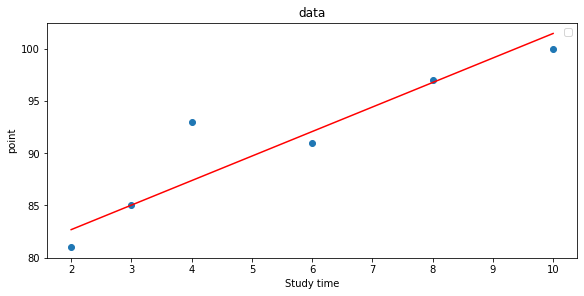

In [23]:
import matplotlib.pyplot as plt
import io
import base64
fig = plt.figure()
fig, ax_lst = plt.subplots(1, 1, figsize = (8,4), constrained_layout = True)
ax_lst.scatter(X_data, Y_data, label = "", c = None)
ax_lst.set_title("data")
ax_lst.set_xlabel("Study time")
ax_lst.set_ylabel("point")
ax_lst.legend(loc = 'best')
ax_lst.plot(X_data, make_model1, label = "", c = 'red')
plt.show()

#sklearn : SLR

In [25]:
#2차원 행렬로 변경
import numpy as np
X_data = np.array(X_data)
X_data = X_data.reshape(-1, 1)
Y_data = np.array(Y_data)
Y_data = Y_data.reshape(-1, 1)

print((np.shape(X_data)))
print((np.shape(Y_data)))

(6, 1)
(6, 1)


In [26]:
#create model [by sklearn]
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_data, Y_data)
predictions = model.predict(X_data)
print('예측값' , str(predictions))

예측값 [[ 83.61403509]
 [ 85.77192982]
 [ 87.92982456]
 [ 92.24561404]
 [ 96.56140351]
 [100.87719298]]


In [27]:
# MSE
from sklearn.metrics import mean_squared_error
MSE = mean_squared_error(Y_data, predictions)
print('MSE:', str(MSE))

MSE: 5.941520467836244


In [32]:
#model
make_model2 = (model.coef_ * X_data) + (model.intercept_)
print('a:', model.coef_)
print('b:', model.intercept_)

a: [[2.15789474]]
b: [79.29824561]


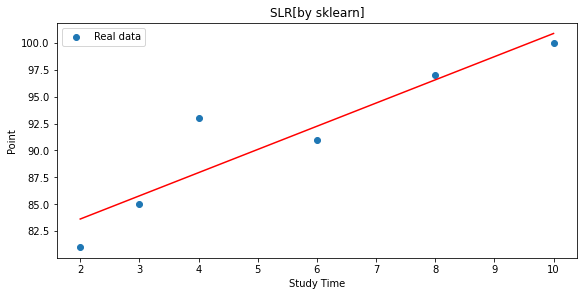

In [33]:
#graph
fig, ax_lst = plt.subplots(1, 1, figsize = (8,4), constrained_layout = True)
ax_lst.scatter(X_data, Y_data, label = 'Real data', c = None)
ax_lst.set_title('SLR[by sklearn]')
ax_lst.set_xlabel('Study Time')
ax_lst.set_ylabel('Point')
ax_lst.legend(loc = 'best')
ax_lst.plot(X_data, make_model2, c = 'red')
plt.show()

#예제1) 간단한 데이터 생성

In [ ]:
#회귀분석을 할 수 있게 도와주는 모듈
from sklearn import linear_model
#numpy : 행렬, 벡터 등 수학 계산을 위한 자료구조와 계산 함수
import numpy as np
#pandas : csv파일, 데이터베이스에서 데이터를 읽고 쓰기, 데이터를 테이블형태로 조작
import pandas as pd
#matplotlib : 시각화 패키지(막대그래프, 히스토그램, 파이차트, 산점도 등)
import matplotlib
#matplotlib의 서브 패키지인 pyplot
import matplotlib.pyplot as plt
#ipython notebook에 그림을 추력할 수 있게하는 코드
%matplotlib inline
#atplotlib에서 제공하는 스타일중 하나인 'ggplot'를 사용하겠다는 코드
matplotlib.style.use('ggplot')

In [ ]:
# 데이터 만들기
data = {'x':[13, 19, 16, 14, 15, 14],
        'y':[40, 83, 62, 48, 58, 43]}

#data변수 에 저장된 데이터를 2차원의 수정가능한 테이블형태로 변경
data= pd.DataFrame(data)
data

,x,y
0,13,40
1,19,83
2,16,62
3,14,48
4,15,58
5,14,43


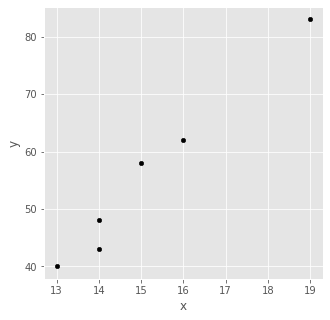

In [ ]:
#산점도 나타내기
data.plot(kind='scatter', x='x', y='y', figsize=(5,5), color='black')

#kind : 기본 선 외의 여러가지 플롯 스타일을 사용 가능하도록 함
#x, y : 각각 가로, 세로에 표시한 데이터를 지정함

In [ ]:
#데이터 학습시키기
#선형회귀모델을 만들어 해당 변수에 저장
linear_regression = linear_model.LinearRegression()

#fit 함수를 통해 모델을 학습함
linear_regression.fit(X=pd.DataFrame(data['x']),y=data['y'])

#학습한 선형회귀모델에 x값을 입력해 y값을 구함, y값이 predicion변수에 저장됨
prediction = linear_regression.predict(X=pd.DataFrame(data['x']))

#선형회귀모델의 a, b 계수를 출력함
#◆종속변수 y의 값 : yi = a(회귀계수) + b(회귀계수)xi+ei(오차항)◆
print('a value = ', linear_regression.intercept_)
print('b value = ', linear_regression.coef_)

a value =  -55.48175182481753
b value =  [7.32846715]


In [ ]:
# 적합도 검증 : 방법1) 표준오차 구하기: 
#residuals = 잔차 : 결과의 오류 : 잔차들의 표준편차
residuals = data['y'] - prediction
residuals.describe()
# 전체개수, 평균, 표준편차, 최대값, 최솟값, 백분위수(25%, 50%, 75%)

count    6.000000e+00
mean     5.921189e-15
std      2.491445e+00
min     -4.116788e+00
25%     -5.164234e-01
50%      2.189781e-01
75%      7.189781e-01
max      3.554745e+00
Name: y, dtype: float64

In [ ]:
#적합도 검증 : 방법2) 결정계수 구하기
#결론: x값이 y값에 97%영향을 준다
SSE = (residuals**2).sum()
SST = ((data['y']-data['y'].mean())**2).sum()
R_squared = 1-(SSE/SST)
print('R_squared = ', R_squared)

R_squared =  0.9753156179610034


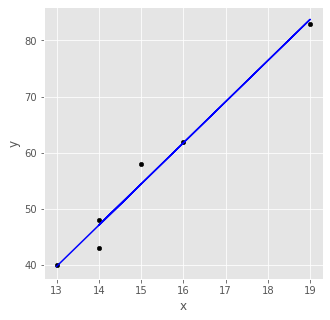

In [ ]:
#예측한 값을 토대로 산포도에 선형회귀선 그리기
data.plot(kind='scatter', x='x', y='y', figsize=(5,5), color='black')
plt.plot(data['x'], prediction, color='blue')

In [ ]:
#해당 회귀분선모델의 성능평가하기
#MSE를 구하기 위한 모듈을 가져옴
from sklearn.metrics import mean_squared_error
#score에 예측한 결과값과 정확한 결과값을 비교해서 성능을 평가한 값을 넣음
print('score = ', linear_regression.score(X=pd.DataFrame(data['x']), y=data['y']))
#평균제곱오차값(MSE)을 구함
print('Mean_Squared_Error = ', mean_squared_error(prediction, data['y']))
#RMSE값을 구함
print('RMSE = ', mean_squared_error(prediction, data['y'])**0.5)
print()
print('결론 : 결정계수값과 score값이 같다는 것을 알수 있고, RMSE결과를 통해 오차도 작다는 것을 알수 있다.')

score =  0.9753156179610034
Mean_Squared_Error =  5.172749391727503
RMSE =  2.2743679103714736

결론 : 결정계수값과 score값이 같다는 것을 알수 있고, RMSE결과를 통해 오차도 작다는 것을 알수 있다.


#예제2)보스턴의 집 가격 데이터
sklearn에서 제공하는 데이터를 사용함

In [ ]:
#데이터 불러오기
from sklearn import datasets
boston_house_prices = datasets.load_boston()

#전체 데이터의 key값 출력
print('key값 : ', boston_house_prices.keys)

#전체 데이터 중 data에 대한 전체 행, 열의 길이 출력
print('전체 행 ,열의 길이 : ', boston_house_prices.data.shape)

#해당 데이터에 사용하는 컬럼 이름 출력
print('컬럼 이름 : ', boston_house_prices.feature_names)

key값 :  <built-in method keys of Bunch object at 0x7f20c8a236d0>
전체 행 ,열의 길이 :  (506, 13)
컬럼 이름 :  ['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']


In [ ]:
# dataset정보 보기 : 각 컬럼들의 설명과, 길이를 확인할 수 있음
print(boston_house_prices.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [ ]:
#데이터 프레임 정제1 : 전체 데이터 중 data에 해당하는 값만 데이터프레임형으로 변경
data_frame = pd.DataFrame(boston_house_prices.data)
data_frame.tail()

,0,1,2,3,4,5,6,7,8,9,10,11,12
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48
505,0.04741,0.0,11.93,0.0,0.573,6.030,80.8,2.5050,1.0,273.0,21.0,396.90,7.88


In [ ]:
#데이터 프레임 정제2 : target데이터만 즉 종속변수만 데이터 프레임에 저장하기
#data_frame에 가격 컬럼을 만들고 해당 데이터에 저장된 데이터 중 타켓데이터를 저장함
data_frame['Price'] = boston_house_prices.target
data_frame.tail()

,0,1,2,3,4,5,6,7,8,9,10,11,12,Price
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0
505,0.04741,0.0,11.93,0.0,0.573,6.030,80.8,2.5050,1.0,273.0,21.0,396.90,7.88,11.9


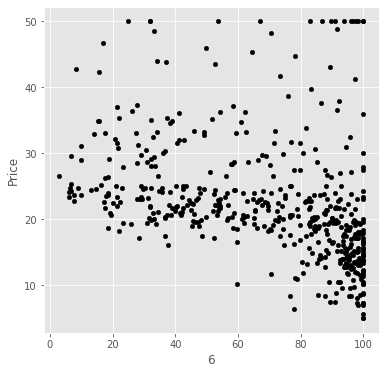

In [ ]:
# 산점도 나타내기
data_frame.plot(kind='scatter', x=6, y='Price', figsize=(6, 6), color='black')

In [ ]:
# 데이터 학습 시키기
linear_regression = linear_model.LinearRegression()
linear_regression.fit(X=pd.DataFrame(data_frame[6]),y=data_frame['Price'])
prediction = linear_regression.predict(X=pd.DataFrame(data_frame[6]))
print('a value = ', linear_regression.intercept_)
print('b value = ', linear_regression.coef_)

a value =  30.97867776261804
b value =  [-0.12316272]


In [ ]:
# 적합도 검증: 표본오차
residuals = data_frame['Price'] - prediction
residuals.describe()

count    5.060000e+02
mean    -5.655555e-15
std      8.518650e+00
min     -1.509662e+01
25%     -5.138002e+00
50%     -1.957464e+00
75%      2.397527e+00
max      3.133759e+01
Name: Price, dtype: float64

In [ ]:
# 적합도 : 결정계수
SSE = (residuals**2).sum()
SST = ((data_frame['Price']-data_frame['Price'].mean())**2).sum()
R_squared = 1-(SSE/SST)
print('R_squared = ', R_squared)
print()
print('x값이 y값에 14% 영향을 준다, 하지만 13개의 독립변수중 1개인 것을 감안하면 비교적 높은 수치임을 알 수 있다.')


R_squared =  0.1420947440778043

x값이 y값에 14% 영향을 준다, 하지만 13개의 독립변수중 1개인 것을 감안하면 비교적 높은 수치임을 알 수 있다.


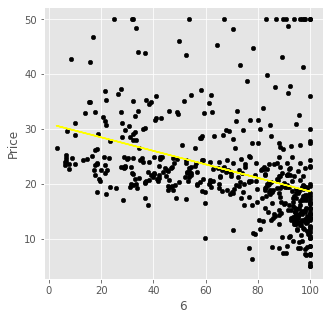

In [ ]:
# 플롯 나타내기
data_frame.plot(kind='scatter', x=6, y='Price', figsize=(5,5), color='black')
plt.plot(data_frame[6], prediction, color='yellow')

In [ ]:
#해당 모델의 성능 평가
from sklearn.metrics import mean_squared_error
print('score = ', linear_regression.score(X=pd.DataFrame(data_frame[6]), y=data_frame['Price']))
print('Mean_Squared_Error = ', mean_squared_error(prediction, data_frame['Price']))
print('RMSE = ', mean_squared_error(prediction, data_frame['Price'])**0.5)
print()
print('결론: RMSE결과를 통해 오차가 비교적 크다는 것을 알수 있다.')

score =  0.14209474407780442
Mean_Squared_Error =  72.42398092899337
RMSE =  8.510228018625199

결론: RMSE결과를 통해 오차가 비교적 크다는 것을 알수 있다.


#예제3) 인구밀도와 절도발생률간의 관계

※ 예제 ) 어느 범죄학 연구자가 인구밀도와 절도발생률 간의 관계를 연구하면서 다음의 16개 도시의 자료를 수집하였다. X는 해당 도시의 단위면적당 인구밀도를, Y는 이전년도의 10만명당 절도범죄의 발생횟수를 조사한 것이다.

X:{ 59, 49, 75, 54, 78, 56, 60, 82, 69, 83, 88, 94, 47, 65, 89, 70}

Y:{ 209, 180, 195, 192, 215, 197, 208, 189, 213, 201, 214, 212, 205, 186, 200, 204} 
    
독립변수 : 인구밀도 = x
종속변수 : 절도범죄 = y   

In [ ]:
# 패키지 불러오기
from sklearn import linear_model
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
matplotlib.style.use('ggplot')

In [ ]:
DATA = {'x':[59, 49, 75, 54, 78, 56, 60, 82, 69, 83, 88, 94, 47, 65, 89, 70],
    'y':[209, 180, 195, 192, 215, 197, 208, 189, 213, 201, 214, 212, 205, 186, 200, 204]}
data = pd.DataFrame(DATA)
data

,x,y
0,59,209
1,49,180
2,75,195
3,54,192
4,78,215
5,56,197
6,60,208
7,82,189
8,69,213
9,83,201


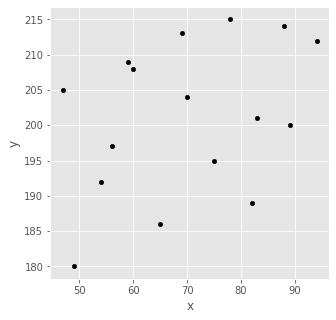

In [ ]:
# 산점도 그리기 kind='scatter'-> 종류는 산점도로 설정
data.plot(kind='scatter', x='x', y='y', figsize=(5,5), color='black')

In [ ]:
#linear_regression = 선형회귀
#독립변수 x 와 종속 변수 y가 있을 때, 실제 x 값에 따른 예측 y 값이 직선상에 있다고 가정하는 모델

# fit => 모델을 훈련시키는 함수
#prediction -> 예측하는 함수
# intercept = 절편 : 회귀분석에서 독립변수(x)가 모두 0일때 종속변수 y의 값
# coef = 계수 : 변수에 묶여있는 수  : 효과를 내기위해 함께 작동하는 것 : 4x의 4
linear_regression = linear_model.LinearRegression()
linear_regression.fit(X=pd.DataFrame(data['x']),y=data['y'])
prediction = linear_regression.predict(X=pd.DataFrame(data['x']))
print('a value = ', linear_regression.intercept_)
print('b value = ', linear_regression.coef_)

a value =  182.9724994372327
b value =  [0.26157425]


In [ ]:
# residuals = 잔차 : 결과의 오류
residuals = data['y'] - prediction
residuals.describe()

count    1.600000e+01
mean    -1.065814e-14
std      9.943299e+00
min     -1.578964e+01
25%     -6.587098e+00
50%      1.048323e+00
75%      9.433162e+00
max      1.197888e+01
Name: y, dtype: float64

In [ ]:
# SSE = y의 편차제곱의 합, SST=개별 y의 편차제곱의 합
#R-squared : R제곱, 결정계수 : 총 변동 중 설명된 변동의 비율
SSE = (residuals**2).sum()
SST = ((data['y']-data['y'].mean())**2).sum()
R_squared = 1-(SSE/SST)
print('R_squared = ', R_squared)

R_squared =  0.13323317178816063


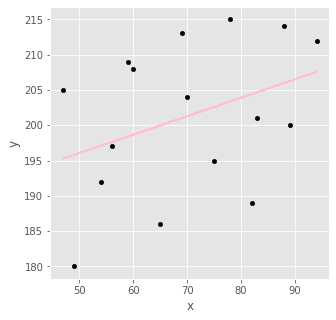

In [ ]:
data.plot(kind='scatter', x='x', y='y', figsize=(5,5), color='black')
plt.plot(data['x'], prediction, color='pink')

In [ ]:
# 모델의 성능평가는 오차율로 평가한다 오차율이 0에 가까울 수록 좋은 것
# RMSE = 편차 제곱의 평균의 루트를 씌운 값 : 큰에러를 최대한 줄이는 방향으로 학습함
# MAE = 편차에 절대값을 씌운것의 평균 : 작은 에러에 더 민감함

# score : 적합한지 여부를 보여줌, 선형회귀에서는 확률로 score를 낼수 없으므로
# 결정계수를 점수 화하여 보여준다
from sklearn.metrics import mean_squared_error
print('score = ', linear_regression.score(X=pd.DataFrame(data['x']), y=data['y']))
print('Mean_Squared_Error = ', mean_squared_error(prediction, data['y']))
print('RMSE = ', mean_squared_error(prediction, data['y'])**0.5)

score =  0.13323317178816063
Mean_Squared_Error =  92.68987769190358
RMSE =  9.627558241418411


# SLR : wheather data

In [35]:
import pandas as pd
import numpy as np
import seaborn as seanornInstance
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
%matplotlib inline

In [37]:
weather_url = 'https://raw.githubusercontent.com/gilbutITbook/080263/master/chap3/data/weather.csv'
wth = pd.read_csv(weather_url)
wth.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow
0,11/1/2007,Canberra,8.0,24.3,0.0,3.4,6.3,NW,30.0,SW,NW,6.0,20,68,29,1019.7,1015.0,7,7,14.4,23.6,No,3.6,Yes
1,11/2/2007,Canberra,14.0,26.9,3.6,4.4,9.7,ENE,39.0,E,W,4.0,17,80,36,1012.4,1008.4,5,3,17.5,25.7,Yes,3.6,Yes
2,11/3/2007,Canberra,13.7,23.4,3.6,5.8,3.3,NW,85.0,N,NNE,6.0,6,82,69,1009.5,1007.2,8,7,15.4,20.2,Yes,39.8,Yes
3,11/4/2007,Canberra,13.3,15.5,39.8,7.2,9.1,NW,54.0,WNW,W,30.0,24,62,56,1005.5,1007.0,2,7,13.5,14.1,Yes,2.8,Yes
4,11/5/2007,Canberra,7.6,16.1,2.8,5.6,10.6,SSE,50.0,SSE,ESE,20.0,28,68,49,1018.3,1018.5,7,7,11.1,15.4,Yes,0.0,No


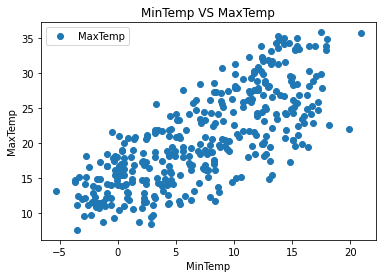

In [38]:
#plot
wth.plot(x='MinTemp', y = 'MaxTemp', style = 'o')
plt.title('MinTemp VS MaxTemp')
plt.xlabel('MinTemp')
plt.ylabel('MaxTemp')
plt.show()

In [39]:
#spliting : attribute(독립변수)/label(종속변수)
X = wth['MinTemp'].values.reshape(-1, 1)
y = wth['MaxTemp'].values.reshape(-1, 1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [40]:
#learning model
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [43]:
#prediction
y_pred = regressor.predict(X_test)
pred_df = pd.DataFrame({'Actual' : y_test.flatten(), 'Predicted' : y_pred.flatten()})
pred_df

,Actual,Predicted
0,19.4,28.174784
1,14.5,15.666405
2,14.1,12.374726
3,18.8,22.578930
4,20.6,16.653908
...,...,...
69,11.5,13.197646
70,19.4,25.459149
71,24.7,20.192463
72,13.1,20.110171


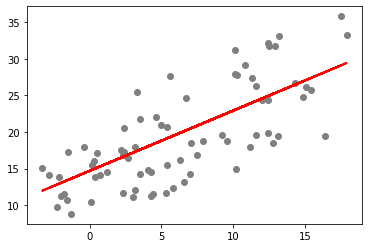

In [44]:
#plot
plt.scatter(X_test, y_test, color = 'gray')
plt.plot(X_test, y_pred, color = 'red', linewidth = 2)
plt.show()

In [45]:
#evaluation model
print('MSE:', metrics.mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

MSE: 20.801668226502624
RMSE: 4.560884588158598
